1) Load Dataset

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import warnings

## Avoid printing out warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    bc = load_breast_cancer()
    X, y = bc.data, bc.target

2) Split and Draw Scatter Plot of Data

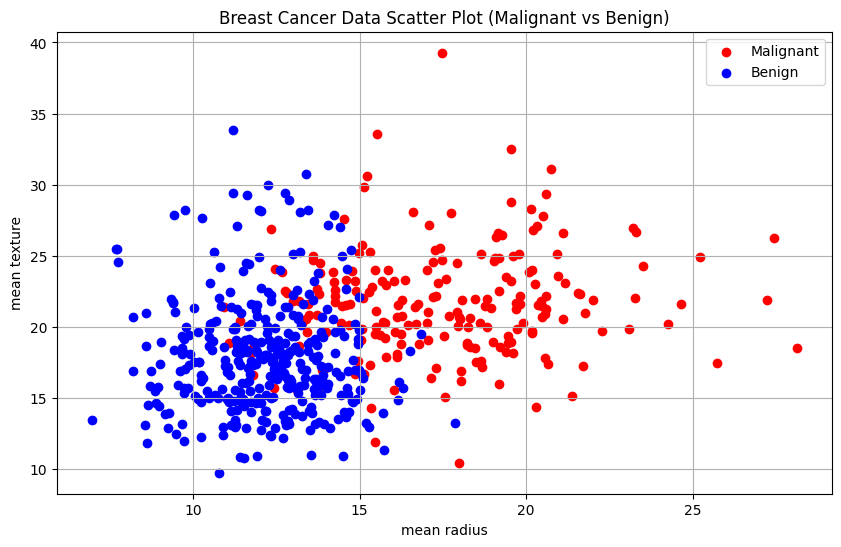

In [8]:
feature1 = 0  # mean radius
feature2 = 1  # mean texture
# Any other feature could be chosen, I just chose the top two for convenience

malignant = X[y == 0]
benign = X[y == 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.scatter(malignant[:, feature1], malignant[:, feature2], color='red', label='Malignant')
plt.scatter(benign[:, feature1], benign[:, feature2], color='blue', label='Benign')
plt.xlabel(bc.feature_names[feature1])
plt.ylabel(bc.feature_names[feature2])
plt.title('Breast Cancer Data Scatter Plot (Malignant vs Benign)')
plt.legend()
plt.grid(True)
plt.show()

3) Define Logistic Regression with following parameters:
   
a) Threshold=0.5
b) Learning rate=0.5
c) epoch = 5000

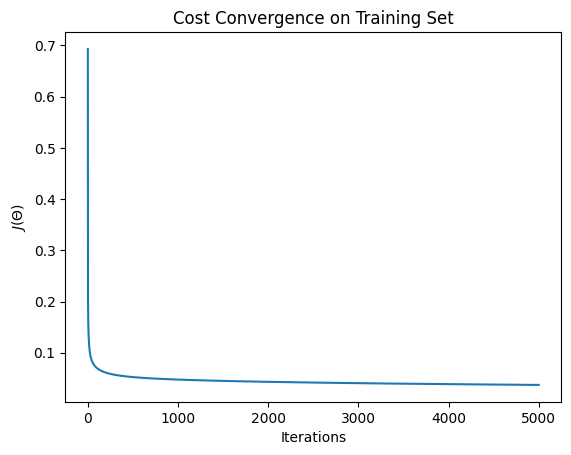

[[-0.28034885]
 [-0.05539268]
 [ 0.09251796]
 [ 0.10937218]
 [-0.19443508]
 [ 0.07183639]
 [ 2.30858753]
 [-1.54917748]
 [-2.98070064]
 [ 1.02177943]
 [-0.71942109]
 [-3.50173784]
 [ 0.57933021]
 [-0.76406026]
 [-2.42867558]
 [-0.83171589]
 [ 0.70519919]
 [ 1.23764903]
 [-0.93481206]
 [ 1.21257406]
 [ 1.41980107]
 [-1.68071322]
 [-2.88749499]
 [-0.43614454]
 [-1.72601331]
 [-0.22333761]
 [ 0.18347066]
 [-2.29232812]
 [-1.33634972]
 [-2.8266189 ]
 [-0.07590844]]


In [9]:
def logistic_regression(z):
    z = np.clip(z, -500, 500)
    return 1/(1 + np.exp(-z))

def compute_cost(theta, X, y):
    m = len(y)
    y_pred = logistic_regression(np.dot(X, theta))
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    error = (y * np.log(y_pred)) + ((1-y) * np.log(1 - y_pred))
    cost = -1/m * np.sum(error)
    #print("Cost", cost)
    gradient = 1/m * np.dot(X.transpose(), (y_pred - y))
    return cost, gradient

def gradient_descent(X, y, theta, L, epoch):
    costs = []
    for i in range(epoch):
        cost, gradient = compute_cost(theta, X, y)
        theta -= L*gradient
        costs.append(cost)
    return theta, costs

theta = np.zeros((X_train.shape[1], 1))
threshold = 0.5
L = 0.5
epoch = 5000
costs = []
w, costs = gradient_descent(X_train, y_train, theta, L, epoch)

plt.plot(range(len(costs)), costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Cost Convergence on Training Set")
plt.show()
print(w)

4) Determining the following for the test dataset:

a) Precision
b) Recall
c) F1 score
d) Confusion Matrix

In [10]:
y_pred = logistic_regression(np.dot(X_test, w))  # w is your optimized weight vector
y_pred_binary = (y_pred >= threshold).astype(int)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
cm = confusion_matrix(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Precision: 0.9857142857142858
Recall: 0.971830985915493
F1 Score: 0.9787234042553191
Confusion Matrix:
 [[42  1]
 [ 2 69]]


5) Plotting the Confusion Matrix and ROC curve

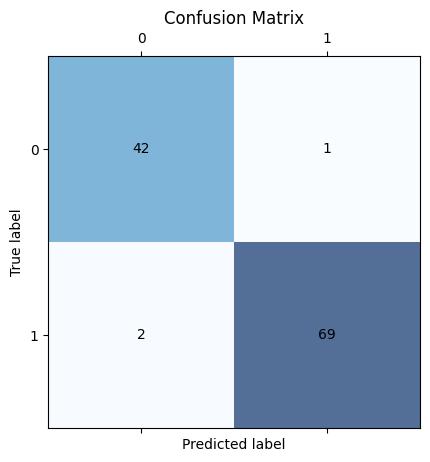

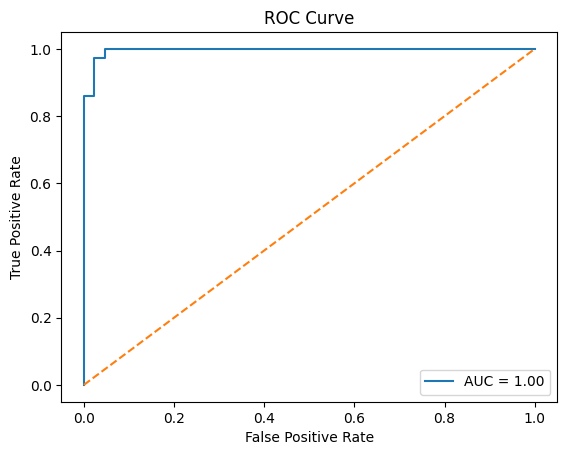

In [11]:
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.7)  # basic style
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], ha="center", va="center")
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")  # reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

6) Plot log loss on every 100th iteration

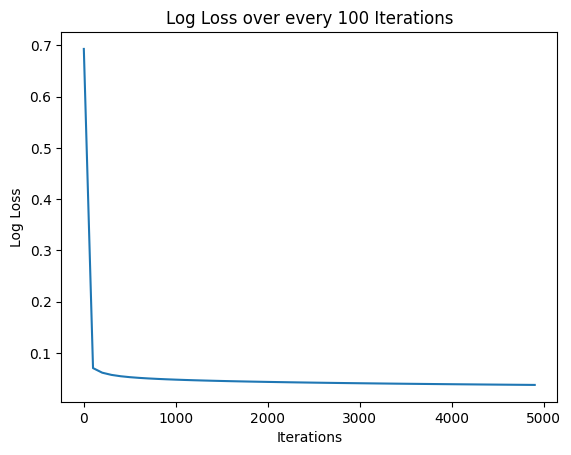

In [12]:
def gradient_descent_100_iter(X, y, theta, L, epoch):
    costs = []
    iteration = []
    for i in range(epoch):
        cost, gradient = compute_cost(theta, X, y)
        theta -= L*gradient

        if i % 100 == 0:
            costs.append(cost)
            iteration.append(i)

    return theta, costs, iteration

theta = np.zeros((X_train.shape[1], 1))
L = 0.5
epoch = 5000

w, costs, iterations = gradient_descent_100_iter(X_train, y_train, theta, L, epoch)
plt.plot(iterations, costs)
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Log Loss over every 100 Iterations")
plt.show()

7) Using the test set as a validation set to finetune hyperparameters.

In [13]:
def hyperparameter_tuning(X_train, y_train, X_test, y_test, learning_rate, epochs, threshold):
    theta = np.zeros((X_train.shape[1], 1))
    w, costs = gradient_descent(X_train, y_train, theta, learning_rate, epochs)

    y_pred = logistic_regression(np.dot(X_test, w))
    y_pred_binary = (y_pred >= threshold).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    precision = precision_score(y_test, y_pred_binary, zero_division=0)
    return precision, fn, w, costs

Ls = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
epochs = [1000, 2000, 3000, 4000, 5000]
thresholds = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]

best_precision = -float('inf')
best_fn = float('inf')
best_params = (0, 0, 0)
best_model = None

theta = np.zeros((X_train.shape[1], 1))

for l in Ls:
    for e in epochs:
        for t in thresholds:
            precision, fn, w, costs = hyperparameter_tuning(X_train, y_train, X_test, y_test, l, e, t)
            print(f"LR: {l}, Epochs: {e}, Thresholds: {t}, Precision: {precision:.4f}, False Negative: {fn}")

            if precision > best_precision or (precision == best_precision and fn < best_fn):
                best_precision = precision
                best_fn = fn
                best_params = (l, e, t)
                best_model = w

print(f"Best Model: Precision={best_precision:.4f}, False Negatives={best_fn}, LR={best_params[0]}, Epochs={best_params[1]}, Threshold={best_params[2]}")


LR: 0.0001, Epochs: 1000, Thresholds: 0.3, Precision: 0.6636, False Negative: 0
LR: 0.0001, Epochs: 1000, Thresholds: 0.35, Precision: 0.7172, False Negative: 0
LR: 0.0001, Epochs: 1000, Thresholds: 0.4, Precision: 0.7634, False Negative: 0
LR: 0.0001, Epochs: 1000, Thresholds: 0.45, Precision: 0.8554, False Negative: 0
LR: 0.0001, Epochs: 1000, Thresholds: 0.5, Precision: 0.9718, False Negative: 2
LR: 0.0001, Epochs: 1000, Thresholds: 0.55, Precision: 1.0000, False Negative: 19
LR: 0.0001, Epochs: 1000, Thresholds: 0.6, Precision: 1.0000, False Negative: 59
LR: 0.0001, Epochs: 1000, Thresholds: 0.65, Precision: 0.0000, False Negative: 71
LR: 0.0001, Epochs: 1000, Thresholds: 0.7, Precision: 0.0000, False Negative: 71
LR: 0.0001, Epochs: 1000, Thresholds: 0.75, Precision: 0.0000, False Negative: 71
LR: 0.0001, Epochs: 2000, Thresholds: 0.3, Precision: 0.7634, False Negative: 0
LR: 0.0001, Epochs: 2000, Thresholds: 0.35, Precision: 0.7802, False Negative: 0
LR: 0.0001, Epochs: 2000, Thr

The hyperparameters that yielded the best parameters are:

LR=0.0005, Epochs=4000, Threshold=0.6

with the result of

Precision = 1.0000, False Negatives = 4